In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import math
import csv
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import LabelEncoder


df = pd.read_csv('hw1_input.csv', parse_dates=True)

### (1) Data Exploration: Please inspect the input features and provide scatter plots and histograms for the data, and explain the dataset

By observing the scatter plots and histograms for the dataset, we can conclude that the dependent varible is relatively less related with fbs, chol, trestbps, restecg.

In [2]:
def preprocessing(x):
    le = LabelEncoder()
    le.fit(x)
    data = le.transform(x) 
    return pd.Series(data)

df['Sex'] = preprocessing(df['Sex'])
df['Chest Pain'] = preprocessing(df['Chest Pain'])
df['fasting blood sugar > 120'] = preprocessing(df['fasting blood sugar > 120'])
df['resting ECG'] = preprocessing(df['resting ECG'])
df['angina'] = preprocessing(df['angina'])
df['slope'] = preprocessing(df['slope'])
df['defect'] = preprocessing(df['defect'])
df['heart disease'] = preprocessing(df['heart disease'])


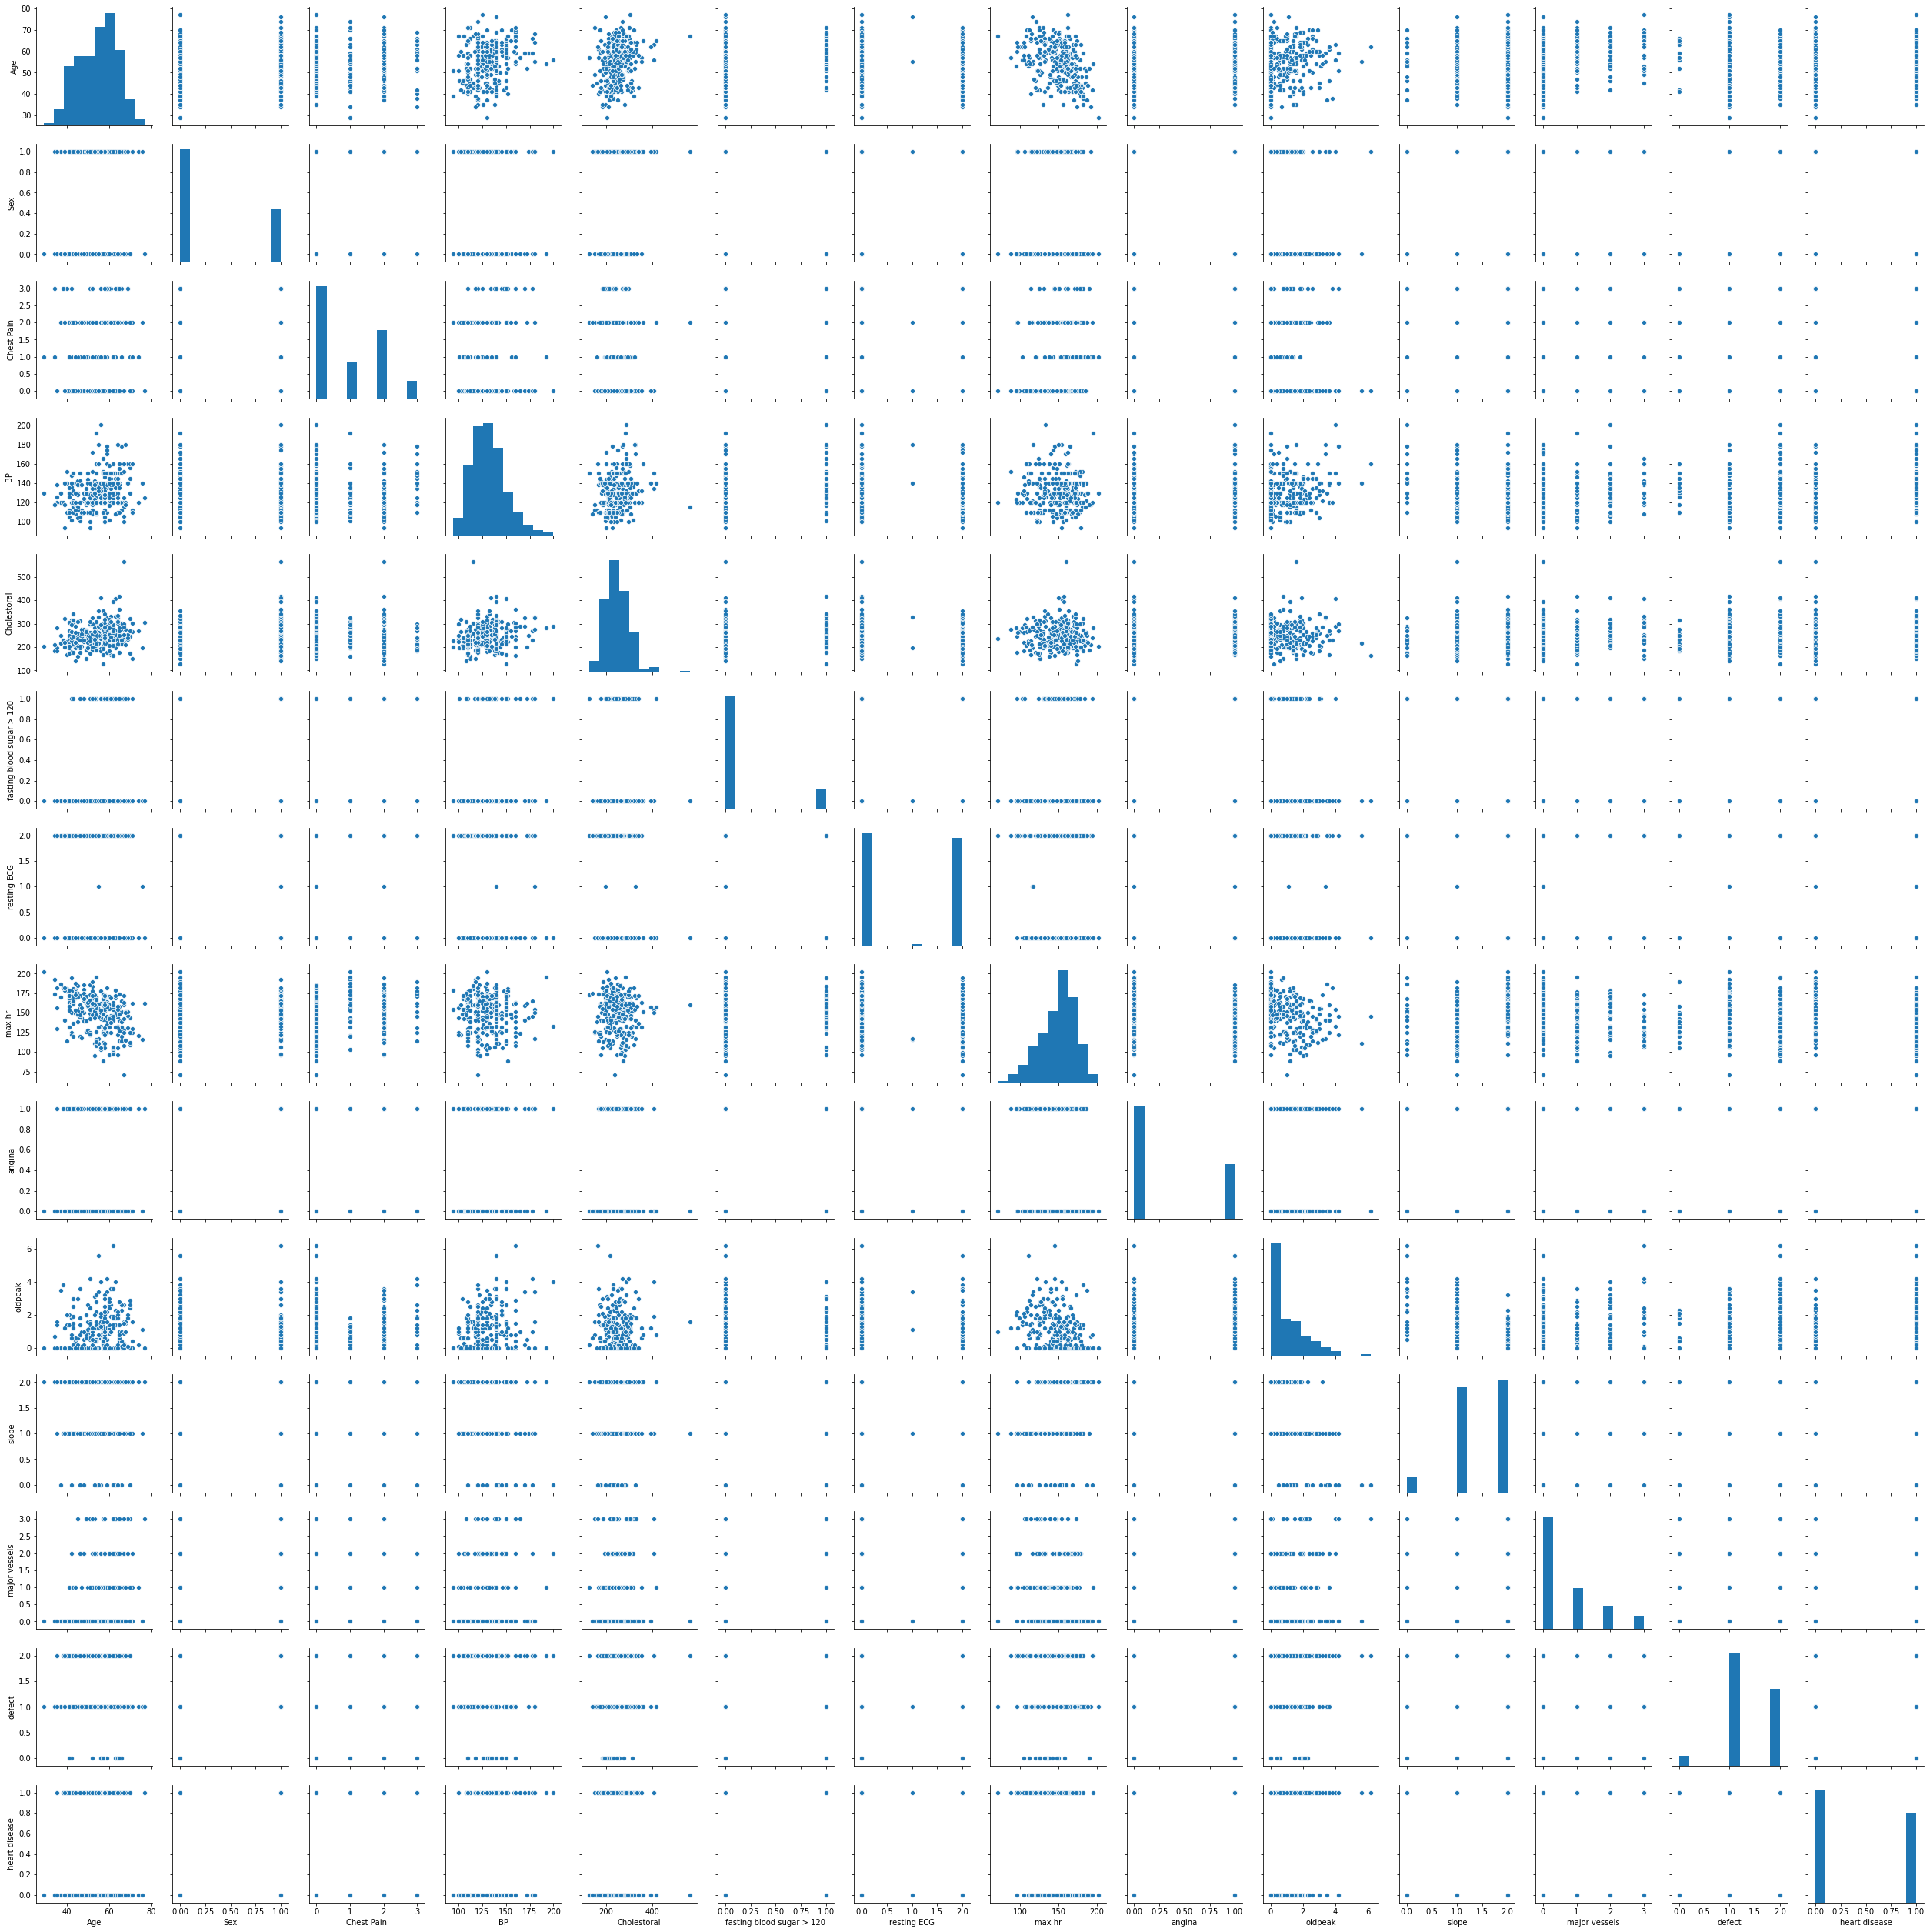

In [3]:
sns.pairplot(df)
plt.show()

In [4]:
df.head(5)

,Age,Sex,Chest Pain,BP,Cholestoral,fasting blood sugar > 120,resting ECG,max hr,angina,oldpeak,slope,major vessels,defect,heart disease
0,70,0,0,130,322,0,0,109,0,2.4,1,3,1,1
1,67,1,2,115,564,0,0,160,0,1.6,1,0,2,0
2,57,0,1,124,261,0,2,141,0,0.3,2,0,2,1
3,64,0,0,128,263,0,2,105,1,0.2,1,1,2,0
4,74,1,1,120,269,0,0,121,1,0.2,2,1,1,0


### (2) Logistic Regression Regularization Comparison with Bootstrapping

In [5]:
x = df[['Age', 'Sex', 'Chest Pain', 'BP', 'Cholestoral', 'fasting blood sugar > 120',
      'resting ECG', 'max hr', 'angina', 'oldpeak', 'slope', 'major vessels', 'defect']]
y = df[['heart disease']]

In [6]:
import statistics
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

n_bootstraps = 1000

#las = LogisticRegression(penalty='l1')
#rid = LogisticRegression(penalty='l2')
las = Lasso(alpha=0.1)
rid = Ridge(alpha=0.1)
l_coef = []
r_coef = []
lasso_auc = []
ridge_auc = []

fpr = dict()
tpr = dict()
roc_auc = dict()

for _ in range(n_bootstraps):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
    las.fit(x_train, y_train.values.ravel())
    rid.fit(x_train, y_train.values.ravel())
    
    fpr['Ridge'], tpr['Ridge'], thr = roc_curve( y_test, rid.predict(x_test))
    fpr['Lasso'], tpr['Lasso'], thl = roc_curve( y_test, las.predict(x_test))
    
    
    lasso_auc.append(auc(fpr['Ridge'], tpr['Ridge']))
    ridge_auc.append(auc(fpr['Lasso'], tpr['Lasso']))
    l_coef.append(las.coef_)
    r_coef.append(rid.coef_)

In [7]:
lasso_coef_mean = np.mean(np.asarray(l_coef), axis=0)
ridge_coef_mean = np.mean(np.asarray(r_coef), axis=0)

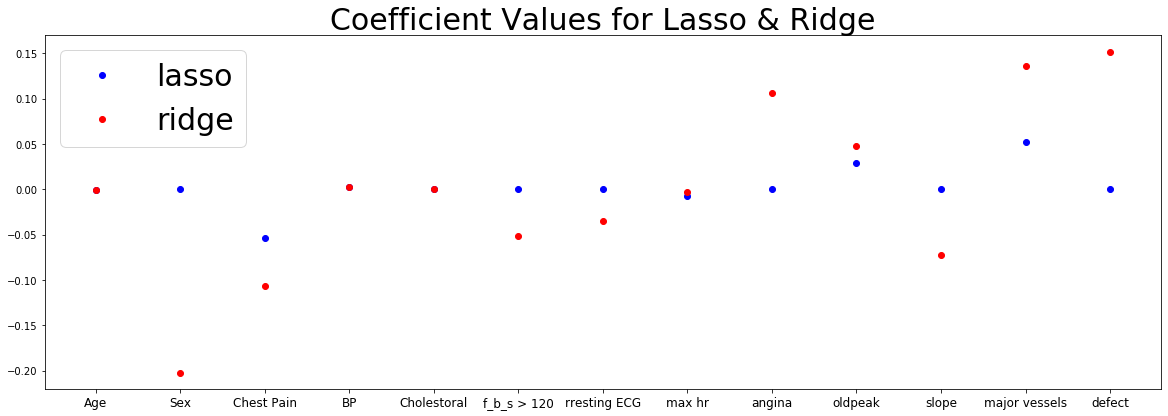

In [8]:
plt.figure(figsize=(20, 6.5))
plt.title('Coefficient Values for Lasso & Ridge', fontsize=30)
plt.plot([0,1,2,3,4,5,6,7,8,9,10,11,12],lasso_coef_mean, 'bo', label = 'lasso')
plt.plot([0,1,2,3,4,5,6,7,8,9,10,11,12], ridge_coef_mean, 'ro', label = 'ridge')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12], ['Age', 'Sex', 'Chest Pain', 'BP', 'Cholestoral', 
                                            'f_b_s > 120', 'rresting ECG', 
                                            'max hr', 'angina', 'oldpeak', 'slope',
                                            'major vessels', 'defect'], fontsize=12)
plt.legend(prop={'size': 30})
plt.show()

### (3) Please plot the ROC curve for both models for a single bootstrap data. What are the area under the curve measurements?

The auc value for lasso is 0.92, and for ridge is 0.95.

In [9]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
las.fit(x_train, y_train.values.ravel())
rid.fit(x_train, y_train.values.ravel())

fpr['Ridge'], tpr['Ridge'], thr = roc_curve( y_test, rid.predict(x_test))
fpr['Lasso'], tpr['Lasso'], thl = roc_curve( y_test, las.predict(x_test))

roc_auc['Ridge'] = auc(fpr['Ridge'], tpr['Ridge'])
roc_auc['Lasso'] = auc(fpr['Lasso'], tpr['Lasso'])
# Compute micro-average ROC curve and ROC area
#fpr["micro"], tpr["micro"], _ = roc_curve(y.values.ravel(), rid.predict(x))
#roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

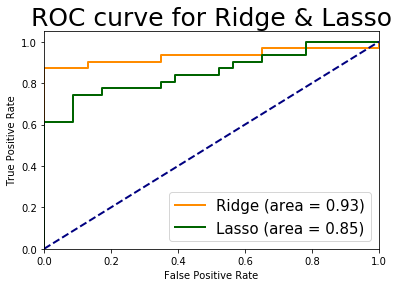

In [10]:
plt.figure()
lw = 2
plt.plot(fpr['Ridge'], tpr['Ridge'], color='darkorange',
         lw=lw, label='Ridge (area = %0.2f)' % roc_auc['Ridge'])

plt.plot(fpr['Lasso'], tpr['Lasso'], color='darkgreen',
         lw=lw, label='Lasso (area = %0.2f)' % roc_auc['Lasso'])

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Ridge & Lasso', fontsize=25)
plt.legend(loc="lower right", prop={'size': 15})
plt.show()

### (4) What is the optimal decision threshold to maximize the f1 score?

I tried threshold from 0.0 to 0.95.
We can see from the result, the optimal decision threshold for lasso is around 0.40. 
And the optimal decision threshold for ridge is around 0.40.

In [11]:
from sklearn.metrics import f1_score

def decision_threshold(y, th):
    ret = np.array(y)
    for i in range(len(y)):
        if y[i] > th:
            ret[i] = 1
        else:
            ret[i] = 0
    return ret

def cal_f1(x, y, th):
    xx = decision_threshold(x, th)
    return f1_score(xx, y)

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
las.fit(x_train, y_train.values.ravel())
rid.fit(x_train, y_train.values.ravel())

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [13]:
for i in range(20):
    print("threshold = %.2f" %(i*0.05))
    print("lasso f1_score: %f" %cal_f1(las.predict(x_test), y_test, i*0.05))
    print("ridge f1_score: %f" %cal_f1(rid.predict(x_test), y_test, i*0.05))

threshold = 0.00
lasso f1_score: 0.714286
ridge f1_score: 0.759494
threshold = 0.05
lasso f1_score: 0.722892
ridge f1_score: 0.769231
threshold = 0.10
lasso f1_score: 0.722892
ridge f1_score: 0.789474
threshold = 0.15
lasso f1_score: 0.740741
ridge f1_score: 0.810811
threshold = 0.20
lasso f1_score: 0.759494
ridge f1_score: 0.869565
threshold = 0.25
lasso f1_score: 0.789474
ridge f1_score: 0.869565
threshold = 0.30
lasso f1_score: 0.833333
ridge f1_score: 0.892308
threshold = 0.35
lasso f1_score: 0.878788
ridge f1_score: 0.903226
threshold = 0.40
lasso f1_score: 0.920635
ridge f1_score: 0.900000
threshold = 0.45
lasso f1_score: 0.881356
ridge f1_score: 0.881356
threshold = 0.50
lasso f1_score: 0.792453
ridge f1_score: 0.857143
threshold = 0.55
lasso f1_score: 0.693878
ridge f1_score: 0.814815
threshold = 0.60
lasso f1_score: 0.652174
ridge f1_score: 0.807692
threshold = 0.65
lasso f1_score: 0.523810
ridge f1_score: 0.760000
threshold = 0.70
lasso f1_score: 0.368421
ridge f1_score: 0.73

/home/chih-yuan/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/home/chih-yuan/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


### (5) Please provide a mean and standard deviation for the AUROCs for each model .

### (6) Please provide a mean and standard deviation for the f1 score for each model.

In [14]:
from statistics import mean
from statistics import variance
print("The mean of AUROC for Lasso is %f" %mean(lasso_auc))
print("The variance of AUROC for Lasso is %f" %variance(lasso_auc))
print("The mean of AUROC for Ridge is %f" %mean(ridge_auc))
print("The variance of AUROC for Ridge is %f" %variance(ridge_auc))

The mean of AUROC for Lasso is 0.910321
The variance of AUROC for Lasso is 0.001378
The mean of AUROC for Ridge is 0.820710
The variance of AUROC for Ridge is 0.003246
